In [2]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
treated = ["ABINGTON",  "AMBLER",  "CHELTENHAM",  "COLLEGEVILLE",  "CONSHOHOCKEN", 
                   "EAST GREENVILLE",  "EAST NORRITON",  "FRANCONIA" , "GREEN LANE", "HATFIELD TOWNSHIP", 
                   "HORSHAM" , "JENKINTOWN",  "LANSDALE",  "LIMERICK",  "LOWER GWYNEDD", 
                   "LOWER MERION",  "LOWER MORELAND",  "LOWER POTTSGROVE",  "LOWER PROVIDENCE",  "LOWER SALFORD", 
                   "MARLBOROUGH",  "MONTGOMERY",  "NARBERTH",  "PENNSBURG",  "PERKIOMEN", 
                   "PLYMOUTH",  "POTTSTOWN",  "RED HILL",  "ROCKLEDGE",  "ROYERSFORD", 
                   "SCHWENKSVILLE",  "SKIPPACK",  "SOUDERTON",  "TELFORD",  "TOWAMENCIN", 
                   "UPPER DUBLIN",  "UPPER FREDERICK",  "UPPER GWYNEDD",  "UPPER HANOVER",  "UPPER MERION", 
                   "UPPER MORELAND",  "UPPER POTTSGROVE",  "UPPER PROVIDENCE",  "UPPER SALFORD",  "WEST CONSHOHOCKEN", 
                   "WEST NORRITON",  "WEST POTTSGROVE",  "WHITEMARSH",  "WHITPAIN",  "WORCESTER"]
control = ["BRIDGEPORT", "BRYN ATHYN", "DOUGLASS", "HATBORO", "HATFIELD BORO", 
                   "LOWER FREDERICK", "NEW HANOVER", "NORRISTOWN", "NORTH WALES", "SALFORD", 
                   "SPRINGFIELD", "TRAPPE"]         

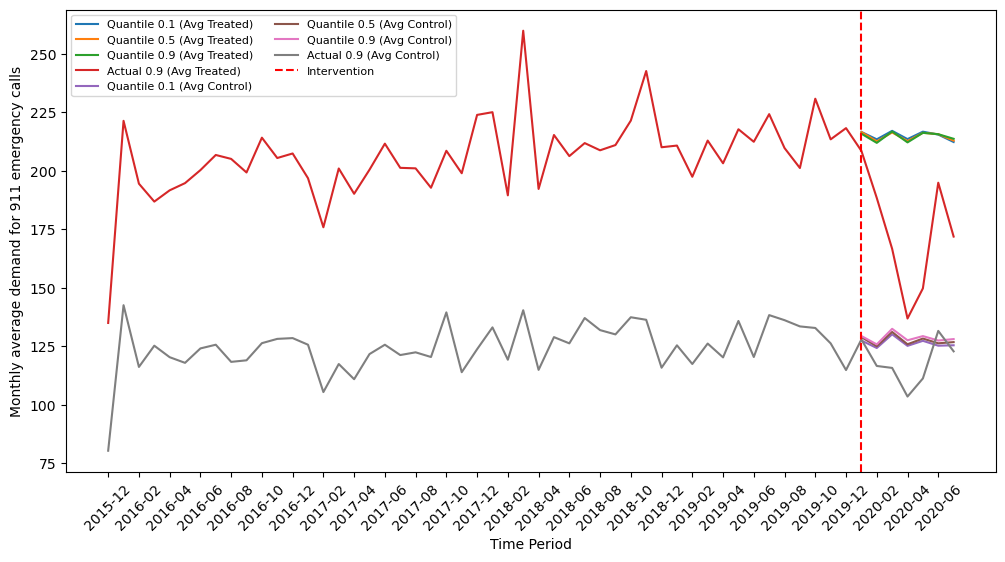

In [3]:

# Get a list of all CSV files in the folder for quantiles 0.1, 0.5, and 0.9
quantiles = ['0.1', '0.5', '0.9']
csv_files = {q: 'callsMT215_without_stl_LSTMcell_cocob_without_stl_decomposition_'+f'{q}.txt' for q in quantiles}


dataset_name = 'calls911_benchmarks'
data_index = pd.read_csv('../../../../datasets/text_data/calls911/'+dataset_name+'.csv')
data_index.set_index(pd.to_datetime(data_index['date'], format = '%Y-%m-%d').apply(lambda x: x.strftime("%Y-%m")), inplace=True)
data_index = data_index.iloc[:,1:]

all_columns = data_index.columns.tolist()

# Create a binary mask indicating whether each column is treated (1) or control (0)
tnc = [1 if col in treated else 0 for col in all_columns]

# Create a dictionary to store the dataframes for each quantile
dfs = {q: [] for q in quantiles}

# Iterate over each quantile
for quantile, files in csv_files.items():
    # Iterate over each file for the quantile
    # Load the text data from CSV
    data = pd.read_csv(files, header=None)

    # Transpose the data for better visualization (units as rows, time periods as columns)
    transposed_data = data.transpose()

    # Append the transposed dataframe to the list for the current quantile
    dfs[quantile].append(transposed_data)

# Concatenate the dataframes along the columns (units) for each quantile
concatenated_data = {q: pd.concat(frames, axis=1) for q, frames in dfs.items()}


# a boolean list to denote whether the unit is treated or controled
tnc_bool = [bool(value) for value in tnc]
flipped_tnc_bool = [not value for value in tnc_bool]

# average predicted treated units
averages_predicted_treated = {q: concatenated_data[q][concatenated_data[q].columns[tnc_bool]].mean(axis=1) for q in quantiles}

# average actual treated units
averages_actual_treated = data_index[data_index.columns[tnc_bool]].mean(axis=1)

# average predicted control units
averages_predicted_control = {q: concatenated_data[q][concatenated_data[q].columns[flipped_tnc_bool]].mean(axis=1) for q in quantiles}

# average actual control units
averages_actual_control = data_index[data_index.columns[flipped_tnc_bool]].mean(axis=1)


# Plot the averages
fig, ax = plt.subplots(figsize=(12, 6))

for quantile, average_data in averages_predicted_treated.items():
    ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Treated)')
ax.plot(averages_actual_treated.index, averages_actual_treated, label=f'Actual {quantile} (Avg Treated)')

for quantile, average_data in averages_predicted_control.items():
    ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Control)')
ax.plot(averages_actual_control.index, averages_actual_control, label=f'Actual {quantile} (Avg Control)')

# Add a vertical line at 2020-01
plt.axvline("2020-01", color='red', linestyle='--', label='Intervention')

ax.set_xlabel('Time Period')
ax.set_ylabel('Monthly average demand for 911 emergency calls')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=8)
plt.xticks(averages_actual_control.index[::2],rotation=45)
plt.show()

In [153]:
data_index

,ABINGTON,AMBLER,BRIDGEPORT,BRYN ATHYN,CHELTENHAM,COLLEGEVILLE,CONSHOHOCKEN,DOUGLASS,EAST GREENVILLE,EAST NORRITON,...,UPPER MORELAND,UPPER POTTSGROVE,UPPER PROVIDENCE,UPPER SALFORD,WEST CONSHOHOCKEN,WEST NORRITON,WEST POTTSGROVE,WHITEMARSH,WHITPAIN,WORCESTER
date,,,,,,,,,,,,,,,,,,,,,
2015-12,514.0,49.0,43.0,19.0,339.0,43.0,51.0,63.0,18.0,178.0,...,276.0,46.0,191.0,11.0,81.0,121.0,32.0,213.0,182.0,64.0
2016-01,727.0,82.0,71.0,15.0,586.0,58.0,110.0,146.0,31.0,286.0,...,460.0,99.0,285.0,34.0,107.0,202.0,75.0,316.0,258.0,95.0
2016-02,713.0,57.0,60.0,18.0,548.0,89.0,95.0,109.0,27.0,220.0,...,389.0,65.0,281.0,42.0,79.0,182.0,83.0,278.0,271.0,77.0
2016-03,668.0,63.0,59.0,18.0,488.0,52.0,111.0,121.0,13.0,246.0,...,338.0,52.0,248.0,19.0,76.0,168.0,52.0,277.0,241.0,85.0
2016-04,728.0,73.0,53.0,16.0,531.0,52.0,94.0,115.0,29.0,205.0,...,372.0,69.0,256.0,33.0,82.0,182.0,48.0,251.0,243.0,110.0
2016-05,661.0,71.0,87.0,24.0,511.0,56.0,86.0,82.0,13.0,219.0,...,428.0,49.0,245.0,37.0,80.0,202.0,70.0,297.0,254.0,92.0
2016-06,674.0,81.0,66.0,26.0,560.0,31.0,91.0,105.0,22.0,240.0,...,425.0,57.0,279.0,27.0,96.0,199.0,39.0,332.0,270.0,94.0
2016-07,721.0,74.0,55.0,26.0,559.0,50.0,127.0,116.0,34.0,243.0,...,428.0,62.0,263.0,17.0,75.0,194.0,59.0,322.0,225.0,96.0
2016-08,751.0,56.0,74.0,14.0,572.0,57.0,114.0,95.0,28.0,254.0,...,409.0,53.0,304.0,46.0,97.0,204.0,73.0,315.0,227.0,76.0


In [147]:
averages_predicted_treated

{'0.1': 0    216.665036
 1    213.508423
 2    217.137242
 3    213.608368
 4    216.783847
 5    215.548903
 6    212.362037
 dtype: float64,
 '0.5': 0    216.631939
 1    212.645669
 2    216.443827
 3    212.778658
 4    216.290586
 5    215.720266
 6    212.964597
 dtype: float64}

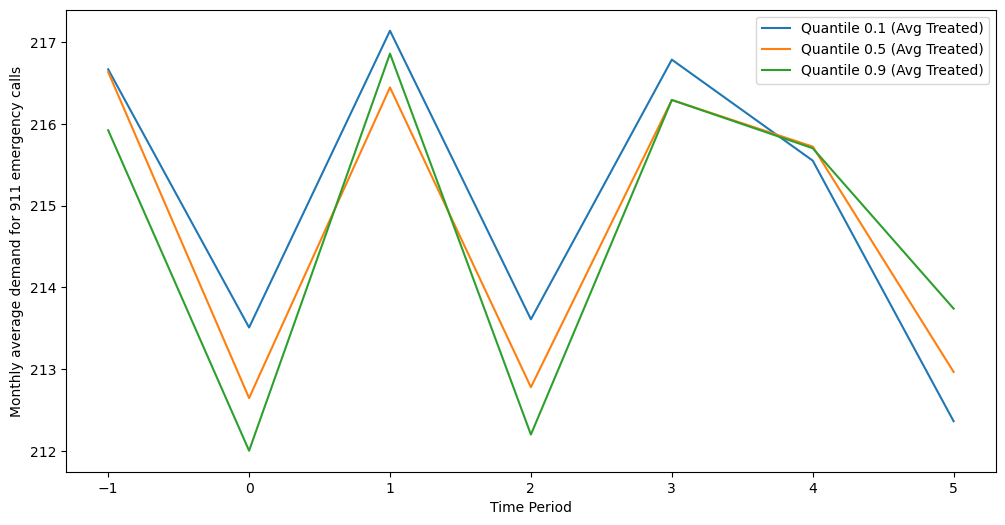

In [151]:
# Plot the averages
fig, ax = plt.subplots(figsize=(12, 6))

for quantile, average_data in averages_predicted_treated.items():
    ax.plot(average_data.index-1, average_data, label=f'Quantile {quantile} (Avg Treated)')

# for quantile, average_data in averages_predicted_control.items():
#     ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Control)')

ax.set_xlabel('Time Period')
ax.set_ylabel('Monthly average demand for 911 emergency calls')
ax.legend()
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=9)
# plt.xticks(averages_actual_control.index[::2],rotation=45)
plt.show()

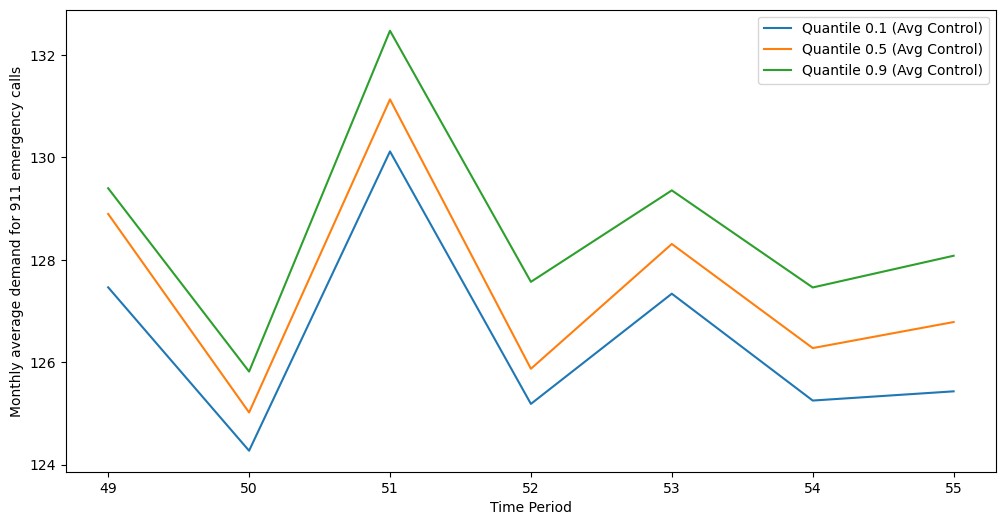

In [152]:
# Plot the averages
fig, ax = plt.subplots(figsize=(12, 6))

# for quantile, average_data in averages_predicted_treated.items():
#     ax.plot(average_data.index-1, average_data, label=f'Quantile {quantile} (Avg Treated)')

for quantile, average_data in averages_predicted_control.items():
    ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Control)')

ax.set_xlabel('Time Period')
ax.set_ylabel('Monthly average demand for 911 emergency calls')
ax.legend()
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=9)
# plt.xticks(averages_actual_control.index[::2],rotation=45)
plt.show()

In [5]:
concatenated_data['0.5']

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,747.141577,87.516486,73.100223,20.738586,581.576715,55.510319,107.388658,92.165612,24.039706,287.328436,...,424.879767,70.939409,307.816008,37.297768,97.989769,216.175961,55.440547,358.475528,260.380689,117.396894
1,735.490264,88.622139,71.034451,22.357785,577.731208,53.287790,104.139642,89.861850,23.589193,278.764419,...,422.451422,65.922097,302.152196,34.399807,94.748399,205.297648,52.636094,348.217044,254.522781,125.215875
2,756.954544,88.053226,75.853966,21.047929,592.370259,53.558333,106.453840,102.687739,21.621335,281.490228,...,420.251597,68.014726,308.959468,36.645633,97.051699,218.740122,55.192099,351.587940,261.442950,116.506261
3,741.548375,89.050963,69.732669,21.815140,583.632307,53.702141,106.118760,93.974612,20.991510,272.275375,...,410.631343,67.784223,305.627774,34.198218,94.599028,211.033975,52.641104,355.199228,254.977331,117.385823
4,754.009934,88.951738,75.480639,20.493267,577.712502,54.454339,105.817323,97.217174,23.142751,278.608507,...,422.557144,68.522833,305.206179,36.162542,101.650778,218.659656,53.204083,356.751306,266.653123,115.573261
5,743.516409,90.941807,71.048821,21.028420,584.867801,55.947635,107.577628,95.420755,22.936694,282.896315,...,418.746325,68.500713,303.709990,35.963826,94.794201,212.002873,55.292998,363.809731,261.282702,120.833157
6,747.064827,88.651661,72.224874,20.468501,575.778288,52.519052,106.705193,96.750269,22.467451,280.499858,...,416.556982,63.685982,301.546993,36.463825,94.827926,208.350513,53.302364,344.560269,259.149813,120.056445


In [6]:
data_index['0.5']

KeyError: '0.5'